# Mp3 audio cutting and analysis

Original intention was to use this to cut away useless part of a long mp3 audio. Also wanted to visualise the sound wave to know when to cut. Later found fffmpeg which runs by typing on command line.

## Get sound clip
Download sound clip
Sound Effect from <a href="https://pixabay.com/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=music&amp;utm_content=25180">Pixabay</a>.

## Pydub

https://www.geeksforgeeks.org/cut-a-mp3-file-in-python/

In [1]:
from pydub import AudioSegment

song = AudioSegment.from_mp3("../data/deep-house-pluck-25180.mp3")
song

This method of cutting is not advisable for extremely long or large-sized audio.
It will take a long long time to load before I'm able to slice it.

In [2]:
# pydub does things in milliseconds
ten_seconds = 10 * 1000

first_10_seconds = song[:ten_seconds]

last_5_seconds = song[-5000:]

In [3]:
first_10_seconds

In [4]:
last_5_seconds

In [5]:
# Save the results as a new file in mp3 audio format
first_10_seconds.export("../data/deep-house-pluck-25180_cut_10secs.mp3", format="mp3")

<_io.BufferedRandom name='../data/deep-house-pluck-25180_cut_10secs.mp3'>

In [6]:
# try importing back
AudioSegment.from_mp3("../data/deep-house-pluck-25180_cut_10secs.mp3")

## Librosa

[Audio Data Analysis Using Deep Learning with Python (Part 1)](https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html)

```cmd
conda install -c conda-forge librosa
```

In [7]:
import librosa

In [8]:
audio_data_location = '../data/deep-house-pluck-25180.mp3'
x , sr = librosa.load(audio_data_location)
print(type(x), type(sr)) #<class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050

<class 'numpy.ndarray'> <class 'int'>


In [9]:
librosa.load(audio_data_location, sr=44100)

(array([-6.4787802e-13, -1.4891970e-12, -2.9230019e-12, ...,
        -3.5390478e-06, -1.9988524e-06,  0.0000000e+00], dtype=float32),
 44100)

In [10]:
librosa.load(audio_data_location, sr=None)


(array([ 0.0000000e+00, -2.2217137e-12, -3.0940487e-12, ...,
         8.7928111e-06,  4.8008515e-06, -3.0398814e-06], dtype=float32),
 24000)

In [11]:
librosa.load(audio_data_location)

(array([-1.7619132e-12, -2.6019269e-12, -1.5969298e-12, ...,
         8.8727829e-06,  2.3056341e-06, -2.9376374e-06], dtype=float32),
 22050)

In [12]:
import IPython.display as ipd
ipd.Audio(audio_data_location)


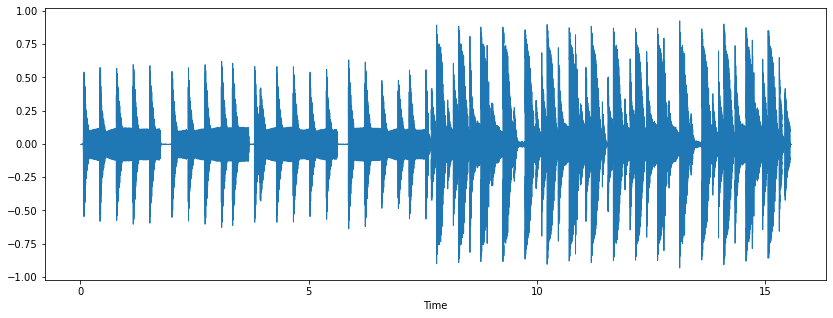

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
plt.show()

In [14]:
duration = 10 # duration in seconds

# To just read in 10 seconds of the audio
audio_time_series, sample_rate = librosa.load(audio_data_location, sr=None, mono=True, duration=duration)

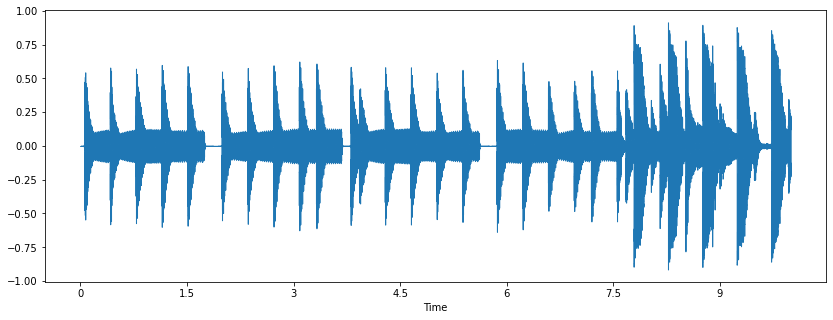

In [15]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio_time_series, sr=sample_rate)
plt.show()

## ffmpeg

https://stackoverflow.com/questions/1390731/how-to-crop-a-mp3-from-x-to-xn-using-ffmpeg

On anaconda powershell

```cmd
cd C:\Users\Jansen-Lin\github-local-repo\test_bed_repo\data
```

Start at 0th seconds, and keep 7 second thereafter:

```cmd
ffmpeg -ss 0 -t 7 -i deep-house-pluck-25180.mp3 -acodec copy deep-house-pluck-25180_7secs.mp3
```

In [16]:
ipd.Audio("../data/deep-house-pluck-25180_7secs.mp3")

33min * 60sec/min = 1980 sec

```cmd
ffmpeg -ss 0 -t 1980 -i "2023-03-31 14-00-24 Research paper Conti meeting.mp3" -acodec copy "2023-03-31 14-00-24 Research paper Conti meeting_33mins.mp3"
```